<a href="https://colab.research.google.com/github/ricardofelippe/Mapa/blob/main/Explorando_as_despesas_do_governo_federal_via_API_%5BEscola_de_Dados%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## API x Bases de Dados
---

Quem não tem fluência em programação, pode pasar por uma certa curva de aprendizagem para começar a usar APIs (*Application Programming Interface*). Em alguns casos, porém, você pode ganhar muito tempo se optar por consumir os dados via API, mesmo que demore mais para criar seu código pela primeira vez.

Confira abaixo uma comparação sobre as duas formas de acessar os dados. Mas atenção: essa comparação não é geral, ela se aplica especificamente ao Portal da Transparência do Governo Federal e à maneira como os dados estão disponibilizados hoje.

| Situação                       |   API           | Download de CSV  |
| :-------------                 | :-------------  | :------------- |
| Preciso de uma série histórica grande| +               | +++++          |
| Não faço pauta desse tema com frequência | ++               | +++++|
| Quero monitorar um assunto/cnpj/órgão etc | +++++               | +          |
| Quero conectar em um site ou visualização | ++++               | ++      |
| *Que outras situações ocorrem a vocês?* |               |      |




### Onde encontrar?

Para conhecer os dados disponíveis, sistema de origem, órgão responsável, periodicidade e data de atualização do Portal (download e API):

http://transparencia.gov.br/origem-dos-dados

- **Acesso via API**

http://www.transparencia.gov.br/swagger-ui.html

O Swagger é uma feramenta que documenta e permite explorar o conteúdo. Iremos falar mais sobre ela abaixo.

- **Bases para download**

http://transparencia.gov.br/download-de-dados

https://brasil.io/dataset/gastos-diretos/gastos (coletado e tratado por Álvaro Justen (Turicas) - tenha atenção para as datas de atualização no site)


# Acessando a API

---



Agora que já compreendemos o básico sobre como as despesas do governo federal são registradas, vamos colocar a mão na massa rodando alguns códigos em Python.

Iremos começar importando os pacotes que iremos utilizar.

Clique no botão de "Play" abaixo para executar o código. Se nenhum erro aparecer, então, deu tudo certo :)

In [1]:
import pandas as pd
import requests
import json
import numpy as np
from IPython.display import Image


In [2]:
# Troque os caracteres abaixo por uma chave válida, criada com seu email, usando o endereço abaixo
# http://www.portaldatransparencia.gov.br/api-de-dados/cadastrar-email
minha_chave = '3fd8bbb6a046fd05f768fb0b7fbefbb3'

# para conseguir acessar a API, precisamos incluir no cabeçalho da requisição a nossa chave, que definimos anteriormente. Não é necessário alterar essa variável.
chave = {'chave-api-dados':minha_chave}

## Fonte de Dados   : https://pncp.gov.br/api/consulta/swagger-ui/index.html#/                                                                                                                                   
           

In [4]:
serie_orgao = []

# O loop abaixo irá tomar como ponto de partido o intervalo de números entre 2019 e e 2019, incluindo estes dois.
# 
#
#
# 
url = f'https://pncp.gov.br/api/consulta/v1/atas?anoAta=20240801&dataInicial=20240828&dataFinal=20250801&pagina=1'
    # esta URL foi gerada a partir da consulta por órgão no swagger

    # aqui, fazemos a consulta e obtemos o resultado para cada ano em JSON
r_orgao = requests.get(url, verify=True,headers=chave).json()

dados=r_orgao['data']
r_orgao=dados
    # e aqui juntamos os resultados de cada ano em uma série histórica do órgão


In [ ]:
r_orgao

## Criando o DATAFRAME

In [30]:
numeroControlePNCPAta=list(map(lambda x:x["numeroControlePNCPAta"],r_orgao))
numeroControlePNCPCompra=list(map(lambda x:x["numeroControlePNCPCompra"],r_orgao))
anoAta=list(map(lambda x:x["anoAta"],r_orgao))
numeroAtaRegistroPreco=list(map(lambda x:x["numeroAtaRegistroPreco"],r_orgao))
#cancelado=list(map(lambda x:x["cancelado"],r_orgao))
dataPublicacaoPncp=list(map(lambda x:x["dataPublicacaoPncp"],r_orgao))
vigenciaInicio=list(map(lambda x:x["vigenciaInicio"],r_orgao))
vigenciaFim=list(map(lambda x:x["vigenciaFim"],r_orgao))
usuario=list(map(lambda x:x["usuario"],r_orgao))
objetoContratacao=list(map(lambda x:x["objetoContratacao"],r_orgao))
nomeOrgao=list(map(lambda x:x["nomeOrgao"],r_orgao))
codigoUnidadeOrgao=list(map(lambda x:x["codigoUnidadeOrgao"],r_orgao))
codigoUnidadeOrgao=list(map(lambda x:x["codigoUnidadeOrgao"],r_orgao))
nomeUnidadeOrgao=list(map(lambda x:x["nomeUnidadeOrgao"],r_orgao))

data = pd.DataFrame([dataPublicacaoPncp,numeroControlePNCPAta,numeroControlePNCPCompra,anoAta, numeroAtaRegistroPreco,
                      vigenciaInicio,vigenciaFim,usuario,objetoContratacao,codigoUnidadeOrgao,nomeOrgao,nomeUnidadeOrgao]) # Each list would be added as a row
data = data.transpose() 
data.columns = ['dataPublicacaoPncp','numeroControlePNCPAta','numeroControlePNCPCompra','anoAta', 'numeroAtaRegistroPreco',
                      'vigenciaInicio','vigenciaFim','usuario','objetoContratacao','codigoUnidadeOrgao','nomeOrgao','nomeUnidadeOrgao']

data=data.query("usuario == 'Contratos.gov.br'")
data=data.reset_index(drop=True)
data


,dataPublicacaoPncp,numeroControlePNCPAta,numeroControlePNCPCompra,anoAta,numeroAtaRegistroPreco,vigenciaInicio,vigenciaFim,usuario,objetoContratacao,codigoUnidadeOrgao,nomeOrgao,nomeUnidadeOrgao
0,2023-05-30,00394502000144-1-001956/2023-000001,00394502000144-1-001956/2023,2023,00036,2023-05-31,2025-05-31,Contratos.gov.br,Registro de preços para a eventual aquisição d...,711000,COMANDO DA MARINHA,GABINETE DO COMANDANTE DA MARINHA
1,2023-06-05,00394452000103-1-002876/2023-000001,00394452000103-1-002876/2023,2023,00001,2023-06-06,2025-06-06,Contratos.gov.br,Serviço de manutenção de bens imóveis.,160515,COMANDO DO EXERCITO,COMANDO DA 2ª BRIGADA DE INFANTARIA DE SELVA
2,2023-06-26,04801221000110-1-000076/2023-000001,04801221000110-1-000076/2023,2023,00002,2023-06-15,2025-06-14,Contratos.gov.br,Registro de Preço para Futura e Eventual Contr...,450522,TRIBUNAL DE CONTAS DO ESTADO DE RONDONIA,PREFEITURA DO MUNICIPIO DE ARIQUEMES
3,2023-06-28,00508903000188-1-000387/2023-000005,00508903000188-1-000387/2023,2023,00027,2023-06-29,2025-06-29,Contratos.gov.br,Aquisição de equipamentos diversos (forno micr...,090016,JUSTICA FEDERAL DE PRIMEIRA INSTANCIA,JUSTICA FEDERAL DE 1A. INSTANCIA - RJ
4,2023-06-28,10742006000198-1-000012/2023-000001,10742006000198-1-000012/2023,2023,00001,2023-06-29,2025-06-29,Contratos.gov.br,Contratação de Serviço Especializado para asse...,158131,"INSTITUTO FEDERAL DE EDUCACAO, CIENCIA E TECNO...","INST.FED.DE EDUC.,CIENC. E TEC.DO TOCANTINS"
...,...,...,...,...,...,...,...,...,...,...,...,...
258,2023-08-30,00394452000103-1-008198/2023-000006,00394452000103-1-008198/2023,2023,00116,2023-08-30,2024-08-30,Contratos.gov.br,Aquisições de materiais de expediente a fim de...,160366,COMANDO DO EXERCITO,13 GRUPO DE ATILHARIA DE CAMPANHA/RS
259,2023-08-30,00394452000103-1-008198/2023-000007,00394452000103-1-008198/2023,2023,00117,2023-08-30,2024-08-30,Contratos.gov.br,Aquisições de materiais de expediente a fim de...,160366,COMANDO DO EXERCITO,13 GRUPO DE ATILHARIA DE CAMPANHA/RS
260,2023-08-30,00394452000103-1-008198/2023-000008,00394452000103-1-008198/2023,2023,00118,2023-08-30,2024-08-30,Contratos.gov.br,Aquisições de materiais de expediente a fim de...,160366,COMANDO DO EXERCITO,13 GRUPO DE ATILHARIA DE CAMPANHA/RS
261,2023-08-30,00394452000103-1-008198/2023-000009,00394452000103-1-008198/2023,2023,00119,2023-08-30,2024-08-30,Contratos.gov.br,Aquisições de materiais de expediente a fim de...,160366,COMANDO DO EXERCITO,13 GRUPO DE ATILHARIA DE CAMPANHA/RS


# Proximos Passos

1- filtrar usuário compras.gov.br
2- Anexar documentos da ata 

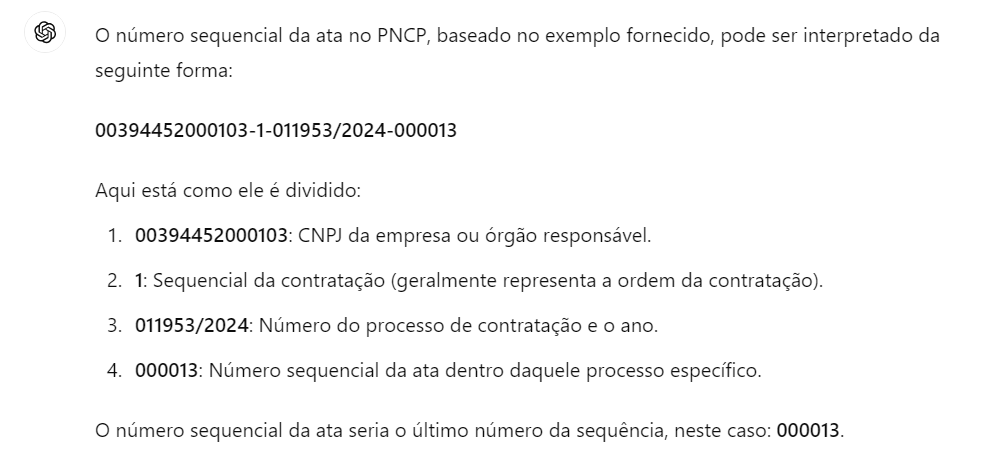

In [8]:
Image("explicacaoNumeracaoPNCP.png")


In [31]:
# Extraindo subconjunto de colunas
# Index(['numeroControlePNCPAta', 'anoAta', 'cancelado', 'vigenciaInicio',
    #    'vigenciaFim', 'usuario', 'objetoContratacao', 'codigoUnidadeOrgao',
    #    'nomeUnidadeOrgao'],
    #   dtype='object')
#url = f'https://pncp.gov.br/api/pncp/v1/orgaos/00394452000103/compras/2024/011953/atas/000003/arquivos'

cols = [0,1] # numeroControlePNCPAta, anoAta
df = data[data.columns[cols]]
df

,dataPublicacaoPncp,numeroControlePNCPAta
0,2023-05-30,00394502000144-1-001956/2023-000001
1,2023-06-05,00394452000103-1-002876/2023-000001
2,2023-06-26,04801221000110-1-000076/2023-000001
3,2023-06-28,00508903000188-1-000387/2023-000005
4,2023-06-28,10742006000198-1-000012/2023-000001
...,...,...
258,2023-08-30,00394452000103-1-008198/2023-000006
259,2023-08-30,00394452000103-1-008198/2023-000007
260,2023-08-30,00394452000103-1-008198/2023-000008
261,2023-08-30,00394452000103-1-008198/2023-000009


In [32]:
# URL BASE= https://pncp.gov.br/api/pncp/v1/orgaos/{cnpj}/compras/{anoCompra}/{sequencialCompra/atas/{sequencialAta}/arquivos
# 01612781000138-1-000020/2022-000001
cnpj=df.numeroControlePNCPAta.str[:14]
sequencialCompra=df.numeroControlePNCPAta.str[17:23]
anoCompra=df.numeroControlePNCPAta.str[24:28]
sequencialAta=df.numeroControlePNCPAta.str[29:35]
DocAta=pd.DataFrame([cnpj,anoCompra, sequencialCompra,sequencialAta])
DocAta = DocAta.transpose() 
DocAta.columns = ['cnpj','anoCompra','sequencialCompra','sequencialAta']
DocAta






,cnpj,anoCompra,sequencialCompra,sequencialAta
0,00394502000144,2023,001956,000001
1,00394452000103,2023,002876,000001
2,04801221000110,2023,000076,000001
3,00508903000188,2023,000387,000005
4,10742006000198,2023,000012,000001
...,...,...,...,...
258,00394452000103,2023,008198,000006
259,00394452000103,2023,008198,000007
260,00394452000103,2023,008198,000008
261,00394452000103,2023,008198,000009


In [33]:
urlAtas.shape

(263, 1)

In [25]:
i=2
DocAta.loc[i, 'cnpj']
numLinhas=DocAta.shape[0]



In [34]:
data.shape

(263, 12)

In [35]:
numLinhas=DocAta.shape[0]
urlAtas=[]
#urlAtasHistoricas=[]
for i in range(numLinhas):
    cnpj=DocAta.loc[i, 'cnpj']
    anoCompra=DocAta.loc[i, 'anoCompra']
    sequencialCompra=DocAta.loc[i, 'sequencialCompra']
    sequencialAta=DocAta.loc[i, 'sequencialAta']

    url1 = f'https://pncp.gov.br/api/pncp/v1/orgaos/{cnpj}/compras/{anoCompra}/{sequencialCompra}/atas/{sequencialAta}/arquivos'
    #url_historico = f'https://pncp.gov.br/api/pncp//v1/orgaos/{cnpj}/compras/{anoCompra}/{sequencialCompra}/atas/{sequencialAta}/historico'
   #url = f'https://pncp.gov.br/api/pncp/v1/orgaos/00394452000103/compras/2024/011953/atas/000003/arquivos' 
    #https://pncp.gov.br/api/pncp//v1/orgaos/00394452000103/compras/2024/011953/atas/000003/historico
    
    # esta URL foi gerada a partir da consulta por órgão no swagger
    #temp=url1[0]['url']
    response = requests.get(url1, verify=True, headers=chave)
    #response2 = requests.get(url_historico, verify=True, headers=chave)
    
    #response = requests.get(url1)

    #print(response.text)

    # Verifica se o tipo de conteúdo é JSON
    
    if 'application/json' in response.headers.get('Content-Type', ''):
        if response.content:
            #data = response.json()  # Tenta parsear como JSON
            temp = response.json()
            temp=temp[0]['url']
            #print(temp)
        else:
            temp=""        
    else:
        temp=""
    urlAtas.append(temp)
    #print(i)
    
    
    

    # aqui, fazemos a consulta e obtemos o resultado para cada ano em JSON
    

In [ ]:
response = requests.get(url1)
    #print(response.text)

    # Verifica se o tipo de conteúdo é JSON
    
    if 'application/json' in response.headers.get('Content-Type', ''):
        if response.content:
            #data = response.json()  # Tenta parsear como JSON
            temp = requests.get(url1, verify=True,headers=chave).json()
            temp=temp[0]['url']
            print(temp)
        else:
            temp=""        
    else:
        temp=""
    urlAtas.append(temp)
    #print(i)
    
    
    

    # aqui, fazemos a consulta e obtemos o resultado para cada ano em JSON
    

In [37]:
df_urlAtas=pd.DataFrame(urlAtas)





In [ ]:
https://pncp.gov.br/api/pncp/v1/orgaos/01612781000138/compras/2022/000021/atas/000001/arquivos

In [41]:
df=pd.DataFrame(data, df_urlAtas)
df = pd.concat([data, df_urlAtas], axis=1)

df.to_excel("output.xlsx",sheet_name='Sheet_name_1')  

data.head()






,dataPublicacaoPncp,numeroControlePNCPAta,numeroControlePNCPCompra,anoAta,numeroAtaRegistroPreco,vigenciaInicio,vigenciaFim,usuario,objetoContratacao,codigoUnidadeOrgao,nomeOrgao,nomeUnidadeOrgao
0,2023-05-30,00394502000144-1-001956/2023-000001,00394502000144-1-001956/2023,2023,00036,2023-05-31,2025-05-31,Contratos.gov.br,Registro de preços para a eventual aquisição d...,711000,COMANDO DA MARINHA,GABINETE DO COMANDANTE DA MARINHA
1,2023-06-05,00394452000103-1-002876/2023-000001,00394452000103-1-002876/2023,2023,00001,2023-06-06,2025-06-06,Contratos.gov.br,Serviço de manutenção de bens imóveis.,160515,COMANDO DO EXERCITO,COMANDO DA 2ª BRIGADA DE INFANTARIA DE SELVA
2,2023-06-26,04801221000110-1-000076/2023-000001,04801221000110-1-000076/2023,2023,00002,2023-06-15,2025-06-14,Contratos.gov.br,Registro de Preço para Futura e Eventual Contr...,450522,TRIBUNAL DE CONTAS DO ESTADO DE RONDONIA,PREFEITURA DO MUNICIPIO DE ARIQUEMES
3,2023-06-28,00508903000188-1-000387/2023-000005,00508903000188-1-000387/2023,2023,00027,2023-06-29,2025-06-29,Contratos.gov.br,Aquisição de equipamentos diversos (forno micr...,090016,JUSTICA FEDERAL DE PRIMEIRA INSTANCIA,JUSTICA FEDERAL DE 1A. INSTANCIA - RJ
4,2023-06-28,10742006000198-1-000012/2023-000001,10742006000198-1-000012/2023,2023,00001,2023-06-29,2025-06-29,Contratos.gov.br,Contratação de Serviço Especializado para asse...,158131,"INSTITUTO FEDERAL DE EDUCACAO, CIENCIA E TECNO...","INST.FED.DE EDUC.,CIENC. E TEC.DO TOCANTINS"


## 6.3.8. Consultar Todos Documentos de uma Contratação


In [ ]:
# Vamos definir os termos de nossa consulta

ano=2019 # você pode mudar o ano de acordo com a necessidade
subfuncao=542 #código referente a "controle ambiental"

In [ ]:
url = f'http://www.transparencia.gov.br/api-de-dados/despesas/por-funcional-programatica?ano={ano}&subfuncao={subfuncao}'
# a base desta URL foi gerada no Swagger. com o comando acima, estamos "colando" os valores definidos anteriormente nas partes adequadas da URL

url

## 6.4.4. Consultar Atas de Registro de Preço por Compra

In [ ]:
/v1/orgaos/{cnpj}/compras/{anoCompra}/{sequencialCompra}/atas



numLinhas=DocAta.shape[0]
urlAtasPorCompras=[]
#urlAtasHistoricas=[]
for i in range(numLinhas):
    cnpj=DocAta.loc[i, 'cnpj']
    anoCompra=DocAta.loc[i, 'anoCompra']
    sequencialCompra=DocAta.loc[i, 'sequencialCompra']
    
    url = f'https://pncp.gov.br/api/pncp/v1/orgaos/{cnpj}/compras/{anoCompra}/{sequencialCompra}/atas'
    #url_historico = f'https://pncp.gov.br/api/pncp//v1/orgaos/{cnpj}/compras/{anoCompra}/{sequencialCompra}/atas/{sequencialAta}/historico'
   #url = f'https://pncp.gov.br/api/pncp/v1/orgaos/00394452000103/compras/2024/011953/atas/000003/arquivos' 
    #https://pncp.gov.br/api/pncp//v1/orgaos/00394452000103/compras/2024/011953/atas/000003/historico
    
    # esta URL foi gerada a partir da consulta por órgão no swagger
    #temp=url1[0]['url']
    response = requests.get(url, verify=True, headers=chave)
    

    # Verifica se o tipo de conteúdo é JSON
    if 'application/json' in response.headers.get('Content-Type', ''):
        data = response.json()  # Tenta parsear como JSON
        temp = requests.get(url, verify=True,headers=chave).json()
        temp=temp[0]['url']
    else:
        temp=""
    urlAtasPorCompras.append(temp)
    urlAtasPorCompras

In [ ]:
data = pd.DataFrame([dataPublicacaoPncp,numeroControlePNCPAta,numeroControlePNCPCompra,anoAta, numeroAtaRegistroPreco,
                      vigenciaInicio,vigenciaFim,usuario,objetoContratacao,codigoUnidadeOrgao,nomeOrgao,nomeUnidadeOrgao,urlAtas]) # Each list would be added as a row
data = data.transpose() 
data.columns = ['dataPublicacaoPncp','numeroControlePNCPAta','numeroControlePNCPCompra','anoAta', 'numeroAtaRegistroPreco',
                      'vigenciaInicio','vigenciaFim','usuario','objetoContratacao','codigoUnidadeOrgao','nomeOrgao','nomeUnidadeOrgao','urlAtas']
 # Rename the


data.to_excel("output.xlsx",sheet_name='Sheet_name_1')  


Temos o nosso resultado! Mas... precisamos fazer uma iteração para coletar todas as páginas, não apenas a primeira.

In [ ]:
# Vamos definir aqui a página inicial e o tamanho do registro que obtemos da API. Se ele for zero, a iteração irá parar.
page = 1
tamanho = len(registro)

# E vamos armazenar as informações de todas as páginas chamando a de "dados"
dados = []

# Aqui a iteração que irá percorrer as páginas
while(tamanho>0):
    print('Baixando a página', page, ' do link:', url+f'&pagina={page}')
    registro = requests.get(url+f'&pagina={page}',headers=chave).json()
    tamanho = len(registro)
    # Se a resposta for válida, vamos juntar o registro da página atual com os dados já coletados
    if tamanho > 0:
      dados = dados + registro
      page = page + 1
      print('O tamanho da última resposta foi',tamanho,'. Iremos seguir em frente!')
    else:
      print('A última requisição veio vazia. Paramos por aqui.')


In [ ]:
# Vamos transformar o JSON em um dataframe do pandas
df = pd.DataFrame(dados)

In [ ]:
# Vamos conferir os 5 últimos registros (útil para checar se todos os dados foram importados)
df.tail(5)

Por fim, vamos agrupar os valores empenhados por programa e função. Para isso, precisaremos converter esta coluna para número.

In [ ]:
# Aqui vamos salvar nosso resultado como um CSV e reimportá-lo especificando que os números estão no formato brasileiro
df.to_csv('arquivo.csv')

In [ ]:
# Desabilita notação científica
pd.set_option('display.float_format', lambda x: '%.3f' % x)

df = pd.read_csv('arquivo.csv', decimal=',', thousands='.')

In [ ]:
df_por_programa = pd.pivot_table(df,
                              values='empenhado',
                              index=['programa'],
                              columns='funcao',
                              aggfunc=np.sum)

df_por_programa